In [16]:
from google.colab import files
uploaded = files.upload()


Saving Ques1.m4a to Ques1 (1).m4a
Saving Ques2.m4a to Ques2 (1).m4a


In [ ]:
!pip install librosa soundfile


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load audio
signal1, sr = librosa.load("Ques1.m4a", sr=16000, mono=True)

print("Sampling rate:", sr)
print("Signal length:", len(signal1))


/tmp/ipython-input-362657651.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  signal1, sr = librosa.load("Ques1.m4a", sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Sampling rate: 16000
Signal length: 106255


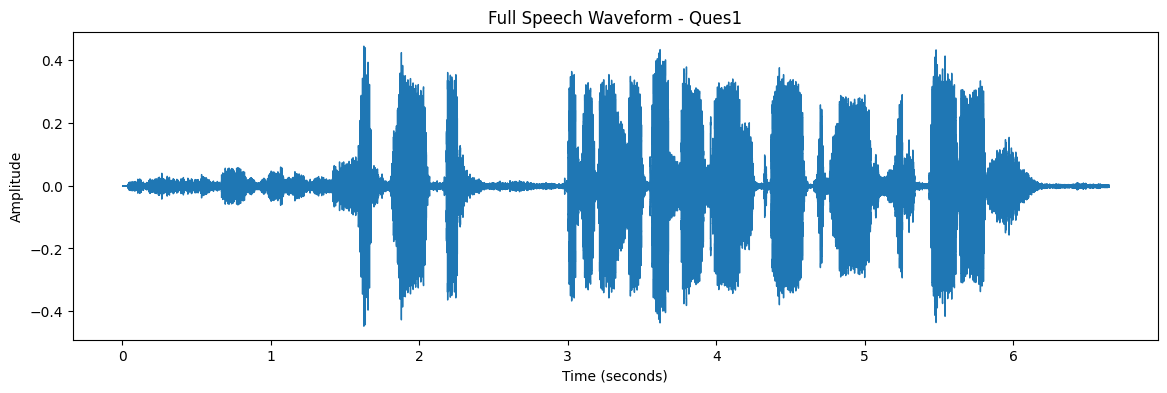

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(signal1, sr=sr)
plt.title("Full Speech Waveform - Ques1")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


In [ ]:

frame_length = int(0.02 * sr)
hop_length   = int(0.01 * sr)

energy = librosa.feature.rms(
    y=signal1,
    frame_length=frame_length,
    hop_length=hop_length
)[0]


threshold = np.mean(energy) * 0.5
speech_frames = energy > threshold


In [ ]:
segments = []
start = None

for i, val in enumerate(speech_frames):
    if val and start is None:
        start = i
    elif not val and start is not None:
        end = i
        segments.append((start, end))
        start = None

# Convert frame index to sample index
phoneme_segments = []
for s, e in segments:
    start_sample = s * hop_length
    end_sample   = e * hop_length
    phoneme_segments.append(signal1[start_sample:end_sample])

print("Number of phoneme segments:", len(phoneme_segments))


Number of phoneme segments: 17


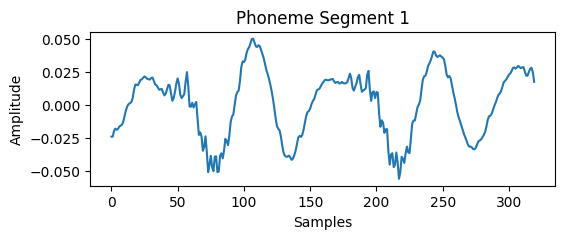

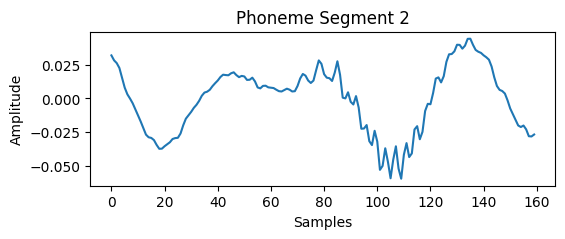

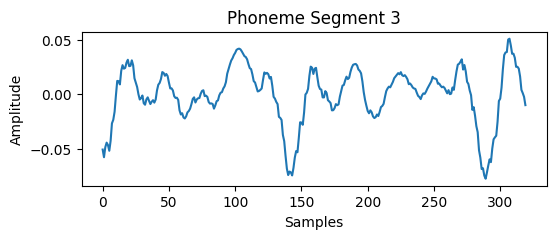

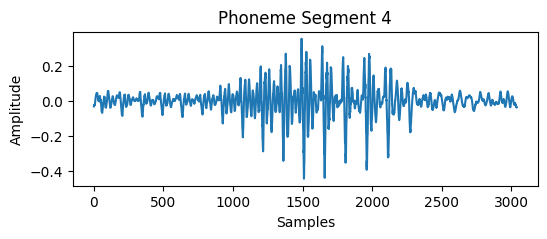

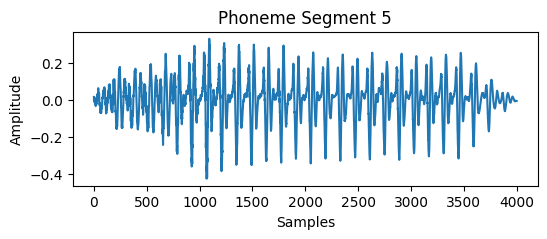

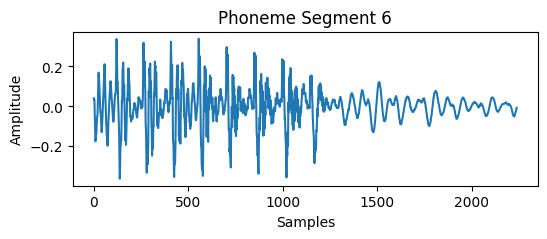

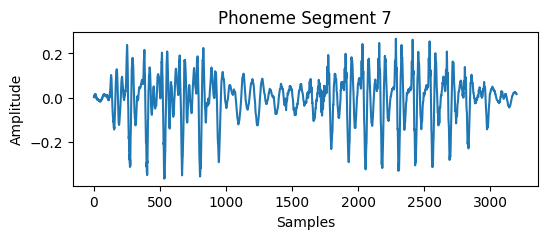

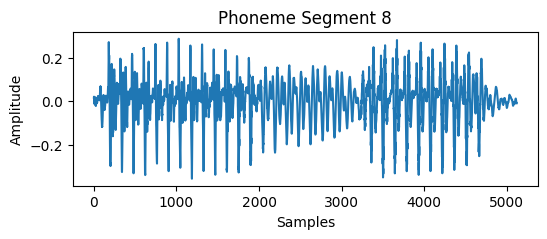

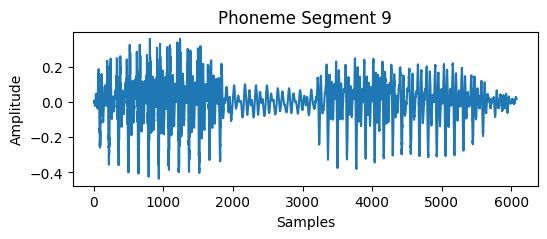

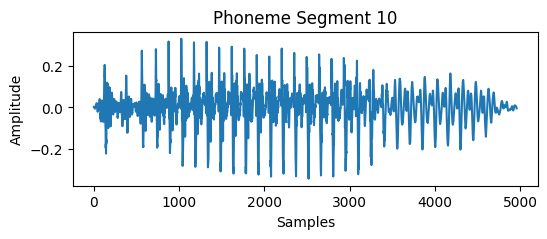

In [ ]:
for i, seg in enumerate(phoneme_segments[:10]):  # show first 10
    plt.figure(figsize=(6,2))
    plt.plot(seg)
    plt.title(f"Phoneme Segment {i+1}")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.show()


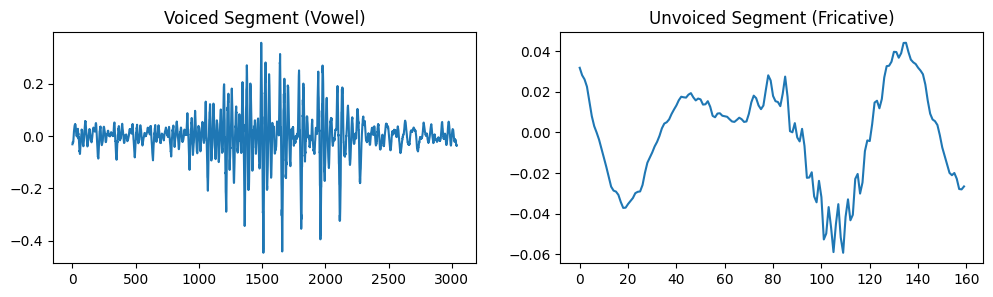

In [ ]:
voiced = phoneme_segments[3]      # example vowel
unvoiced = phoneme_segments[1]    # example fricative

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.plot(voiced)
plt.title("Voiced Segment (Vowel)")

plt.subplot(1,2,2)
plt.plot(unvoiced)
plt.title("Unvoiced Segment (Fricative)")
plt.show()


/tmp/ipython-input-3901667391.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  signal2, sr = librosa.load("Ques2.m4a", sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


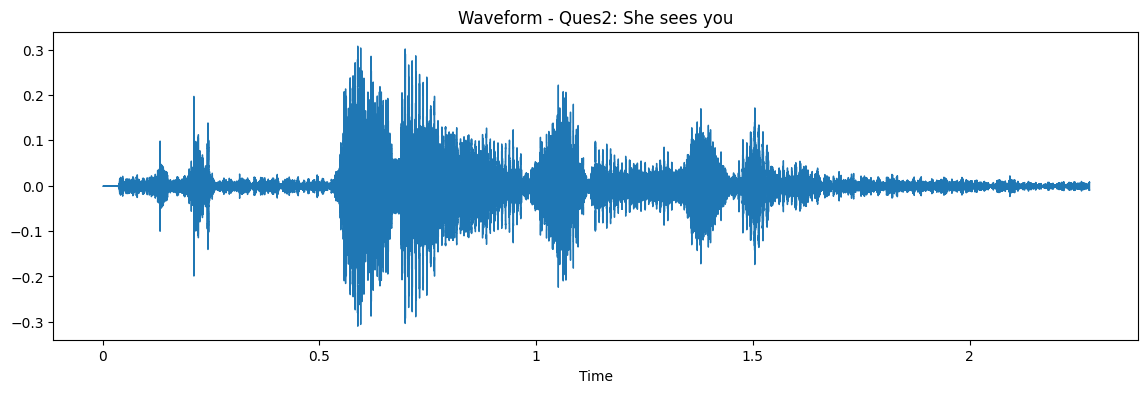

In [ ]:
signal2, sr = librosa.load("Ques2.m4a", sr=16000, mono=True)

plt.figure(figsize=(14,4))
librosa.display.waveshow(signal2, sr=sr)
plt.title("Waveform - Ques2: She sees you")
plt.show()


In [ ]:
energy2 = librosa.feature.rms(
    y=signal2,
    frame_length=frame_length,
    hop_length=hop_length
)[0]

speech_frames2 = energy2 > (np.mean(energy2) * 0.5)

segments2 = []
start = None
for i, val in enumerate(speech_frames2):
    if val and start is None:
        start = i
    elif not val and start is not None:
        end = i
        segments2.append((start, end))
        start = None

phoneme_segments2 = []
for s, e in segments2:
    phoneme_segments2.append(signal2[s*hop_length:e*hop_length])

print("Segments extracted:", len(phoneme_segments2))


Segments extracted: 5


In [ ]:
fricative_s = phoneme_segments2[1]   # /s/ or /ʃ/
approximant_j = phoneme_segments2[3] # /j/


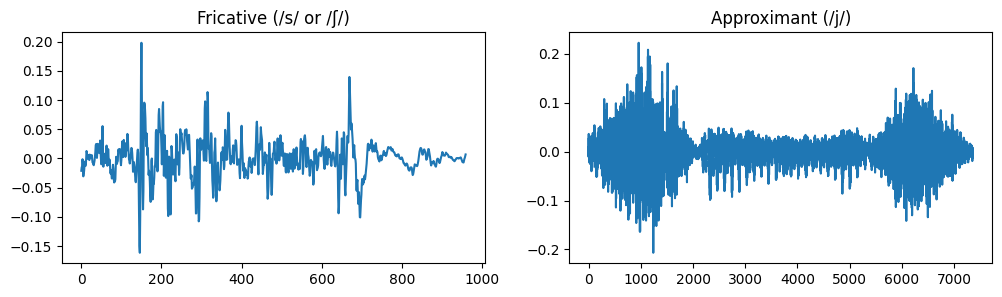

In [ ]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.plot(fricative_s)
plt.title("Fricative (/s/ or /ʃ/)")

plt.subplot(1,2,2)
plt.plot(approximant_j)
plt.title("Approximant (/j/)")

plt.show()


In [18]:
!pip install transformers torch librosa soundfile
!pip uninstall -y transformers
!pip install transformers==4.35.2



Found existing installation: transformers 4.57.6
Uninstalling transformers-4.57.6:
  Successfully uninstalled transformers-4.57.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 84.1 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.2
    Uninstalling tokenizers-0.22.2:
      Successfully uninstalled tokenizers-0.22.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.2.0 requires transformers<6.0.0,>=4.41.0, but you have transformers 4.35.2 which is incompatible.


In [1]:
import librosa
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC

signal, sr = librosa.load("Ques1.m4a", sr=16000, mono=True)
duration = len(signal) / sr
print("Duration:", duration)


/usr/local/lib/python3.12/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.12/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.12/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/tmp/ipython-input-896740353.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load("Ques1.m4a", sr=16000, mono=True)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.c

Duration: 6.6409375


In [2]:
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
model.eval()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0']
You sho

Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder)

In [3]:
inputs = processor(signal, sampling_rate=16000, return_tensors="pt", padding=True)

with torch.no_grad():
    logits = model(inputs.input_values).logits

predicted_ids = torch.argmax(logits, dim=-1)
tokens = processor.decode(predicted_ids[0])

phonemes = tokens.split()
print(phonemes)


['SHE', 'JUDGEDER', 'BLUE', 'PEN', 'PUT', 'IT', 'ON', 'THE', 'TABLE', 'AND', 'QUIETUTELY', 'MISS', 'PURLIUS']


In [4]:
time_per_phoneme = duration / len(phonemes)

segments = []
for i, p in enumerate(phonemes):
    start = int(i * time_per_phoneme * sr)
    end   = int((i+1) * time_per_phoneme * sr)
    segments.append((p, signal[start:end]))


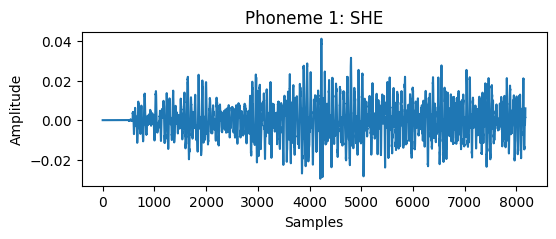

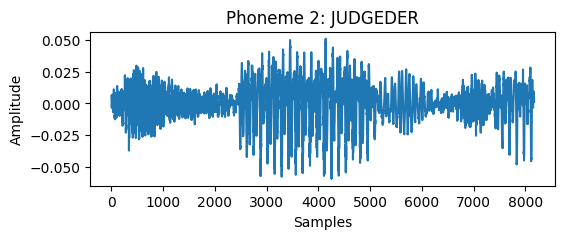

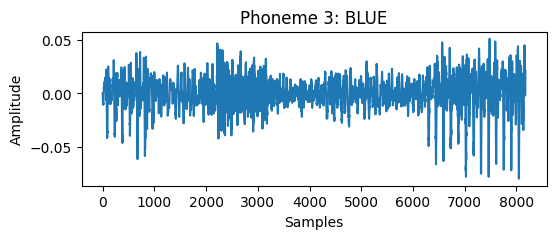

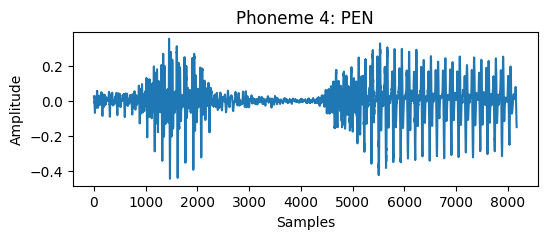

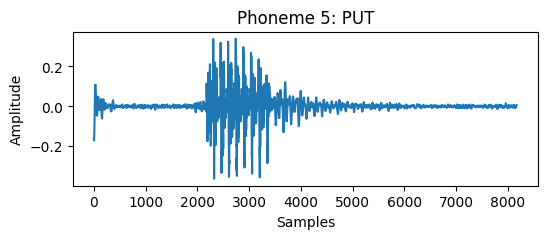

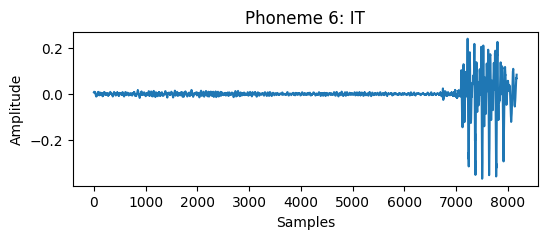

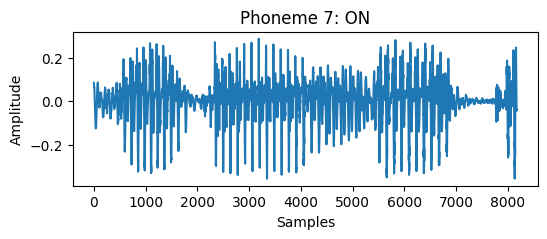

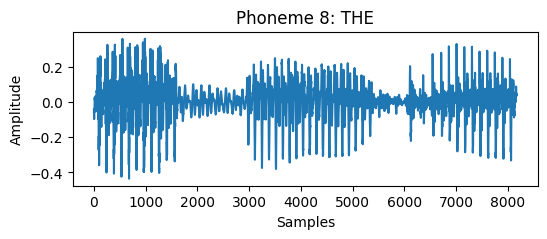

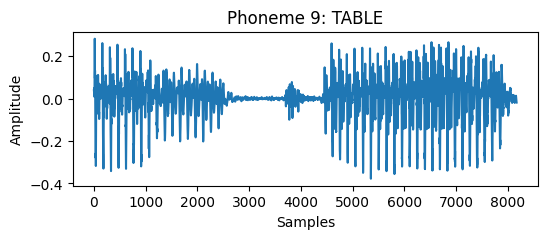

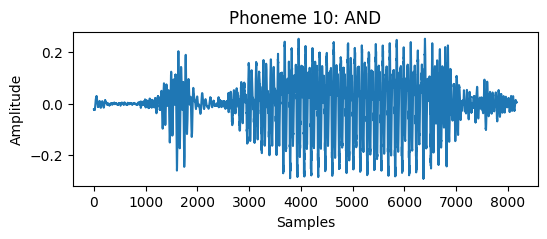

In [5]:
for i, (p, seg) in enumerate(segments[:10]):  # first 10
    plt.figure(figsize=(6,2))
    plt.plot(seg)
    plt.title(f"Phoneme {i+1}: {p}")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.show()
